<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Define--the-Problem" data-toc-modified-id="Define--the-Problem-1">Define  the Problem</a></span></li><li><span><a href="#Import-the-libraries-and-the-dataset" data-toc-modified-id="Import-the-libraries-and-the-dataset-2">Import the libraries and the dataset</a></span></li><li><span><a href="#Seasonal-changes-and-seasonal_decompose" data-toc-modified-id="Seasonal-changes-and-seasonal_decompose-3">Seasonal changes and seasonal_decompose</a></span></li><li><span><a href="#Stationarity" data-toc-modified-id="Stationarity-4">Stationarity</a></span></li><li><span><a href="#Augmented-Dickey-Fuller-Test" data-toc-modified-id="Augmented-Dickey-Fuller-Test-5">Augmented Dickey-Fuller Test</a></span></li><li><span><a href="#Detrending" data-toc-modified-id="Detrending-6">Detrending</a></span></li><li><span><a href="#Differencing" data-toc-modified-id="Differencing-7">Differencing</a></span><ul class="toc-item"><li><span><a href="#Combining-Detrending-and-Differencing" data-toc-modified-id="Combining-Detrending-and-Differencing-7.1">Combining Detrending and Differencing</a></span></li></ul></li><li><span><a href="#Set-Train-&amp;-Test-Datasets" data-toc-modified-id="Set-Train-&amp;-Test-Datasets-8">Set Train &amp; Test Datasets</a></span></li></ul></div>

# Define  the Problem

- With this data we want you to deliver some insights:

How is the company evolving? Is the revenue growing? Would you invest money on them? Try to demonstrate your opinion visually or with some metric, the way you prefer.
Can you find a temporal pattern in the revenue? If you find any, why do you think it happens?
Tools
Assignments may take time so we encourage you to use the tools you feel most comfortable working with so you are faster.

- For the deliver we would like to see:

A pdf file with some insights of our fake company (metrics, confidence in...) made for non-technical audiences.
Attach all the files you’ve used to manipulate the data and reach those conclusions (a notebook with some code, for example). Try to be clear on how you do things, we will go through it and value how you work.

# Import the libraries and the dataset

In [1]:
### import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys  
#sys.path.insert(0, '/Users/yuliyahilevich/Desktop/Data Science All Women/functions')

#from Functions_EDA import *
#from functions_plot_EDA import *

In [3]:
# Loading Data
df = pd.read_csv('Fake data - Sheet1.csv')


In [4]:
df.head()

,Date,Revenue
0,2019-01-01,0.0
1,2019-01-02,165.9
2,2019-01-03,0.0
3,2019-01-04,0.0
4,2019-01-05,0.0


In [5]:
df.tail()

,Date,Revenue
845,2021-04-25,2573.89
846,2021-04-26,820.88
847,2021-04-27,336.79
848,2021-04-28,258.00
849,2021-04-29,78.40


In [6]:
df.tail()

,Date,Revenue
845,2021-04-25,2573.89
846,2021-04-26,820.88
847,2021-04-27,336.79
848,2021-04-28,258.00
849,2021-04-29,78.40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     850 non-null    object 
 1   Revenue  850 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     850 non-null    datetime64[ns]
 1   Revenue  850 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.4 KB


In [9]:
forecast=df.loc[:, ['Date', 'Revenue']].copy()
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     850 non-null    datetime64[ns]
 1   Revenue  850 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.4 KB


In [10]:
# Set the date as index 
forecast = df.set_index('Date')
# Select the proper time period for weekly aggreagation
forecast = forecast['2019-01-01':'2021-04-25'].resample('W').sum()
forecast.head()

,Revenue
Date,
2019-01-06,165.9
2019-01-13,19.8
2019-01-20,100.8
2019-01-27,74.6
2019-02-03,377.4


In [11]:
forecast.tail()

,Revenue
Date,
2021-03-28,9275.99
2021-04-04,9677.97
2021-04-11,10477.23
2021-04-18,12651.29
2021-04-25,10049.28


In [12]:
#Lets get ride of the last week, as after resampling we had extra week
#forecast = forecast[:-1]
#forecast

In [13]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2019-01-06 to 2021-04-25
Freq: W-SUN
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Revenue  121 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


# Seasonal changes and seasonal_decompose

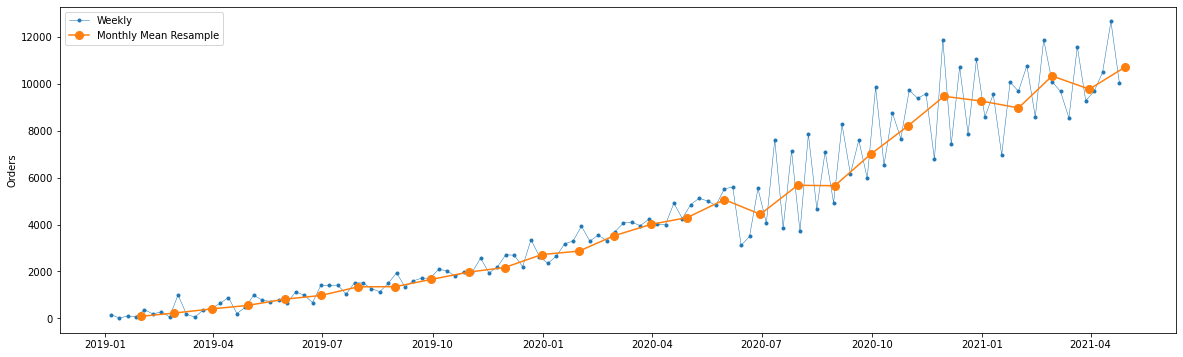

In [14]:
import warnings
import matplotlib.pyplot as plt
y = forecast['Revenue']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Orders')
ax.legend();

By looking at the graph of sales data above, we can see a general increasing trend with no clear pattern of seasonal or cyclical changes. 

In [15]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

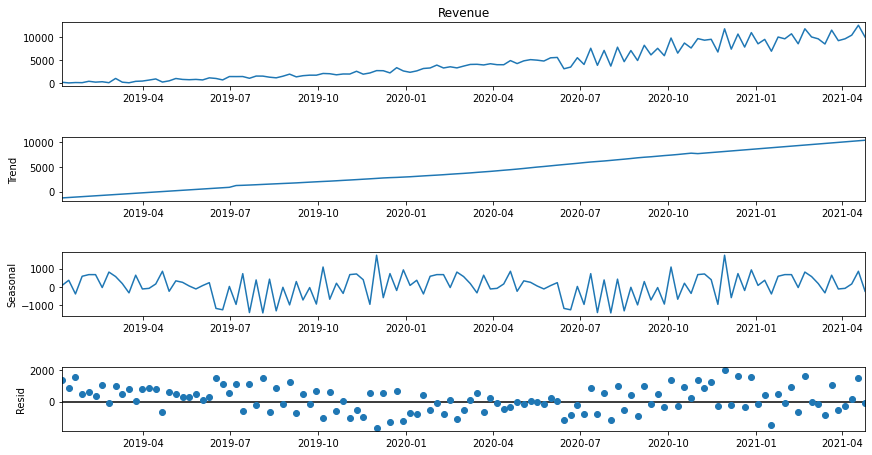

In [16]:
seasonal_decompose(y)

After looking at the four pieces of decomposed graphs, we can tell that our sales dataset has an overall increasing trend as well as a yearly seasonality. Depending on the components of your dataset like trend, seasonality, or cycles, your choice of model will be different.

# Stationarity

Next, we need to check whether the dataset is stationary or not. A dataset is stationary if its statistical properties like mean, variance, and autocorrelation do not change over time.

Most time series datasets related to business activity are not stationary since there are usually all sorts of non-stationary elements like trends and economic cycles. But, since most time series forecasting models use stationarity—and mathematical transformations related to it—to make predictions, we need to ‘stationarize’ the time series as part of the process of fitting a model.

Two common methods to check for stationarity are Visualization and the Augmented Dickey-Fuller (ADF) Test

This method graphs the rolling statistics (mean and variance) to show at a glance whether the standard deviation changes substantially over time:

In [17]:
### plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

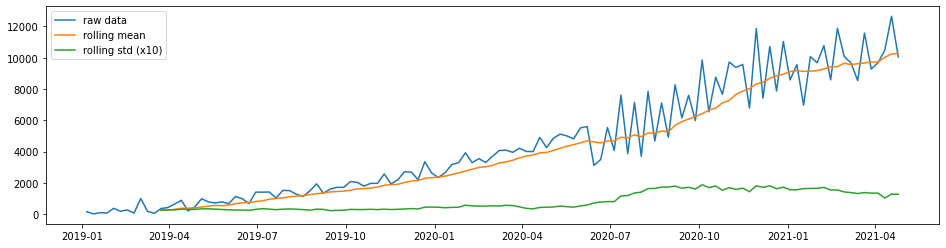

In [18]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')

# Augmented Dickey-Fuller Test

The ADF approach is essentially a statistical significance test that compares the p-value with the critical values and does hypothesis testing. Using this test, we can determine whether the processed data is stationary or not with different levels of confidence.

In [19]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [20]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = 1.484
P-value = 0.997
Critical values :
	1%: -3.489589552580676 - The data is not stationary with 99% confidence
	5%: -2.887477210140433 - The data is not stationary with 95% confidence
	10%: -2.580604145195395 - The data is not stationary with 90% confidence


Looking at both the visualization and ADF test, we can tell that our sample sales data is non-stationary.

To proceed with our time series analysis, we need to stationarize the dataset. There are many approaches to stationarize data, but we’ll use de-trending, differencing, and then a combination of the two.

# Detrending

This method removes the underlying trend in the time series:

 > Is the de-trended data stationary ?
Test statistic = -3.293
P-value = 0.015
Critical values :
	1%: -3.4936021509366793 - The data is not stationary with 99% confidence
	5%: -2.8892174239808703 - The data is  stationary with 95% confidence
	10%: -2.58153320754717 - The data is  stationary with 90% confidence


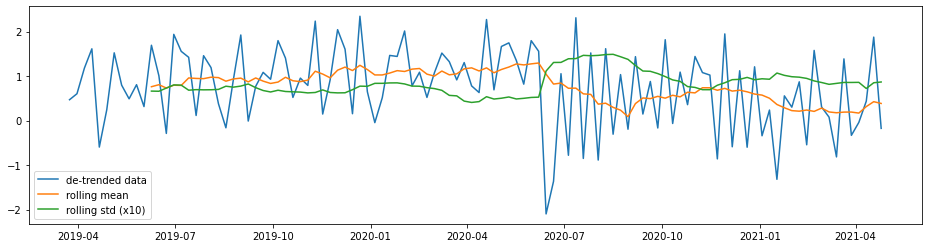

In [21]:
# Detrending
y_detrend =  (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

# Differencing

This method removes the underlying seasonal or cyclical patterns in the time series. Since the sample dataset has a 12-month seasonality, I used a 12-lag difference:



 > Is the 12 lag differenced data stationary ?
Test statistic = -2.469
P-value = 0.123
Critical values :
	1%: -3.5011373281819504 - The data is not stationary with 99% confidence
	5%: -2.8924800524857854 - The data is not stationary with 95% confidence
	10%: -2.5832749307479226 - The data is not stationary with 90% confidence


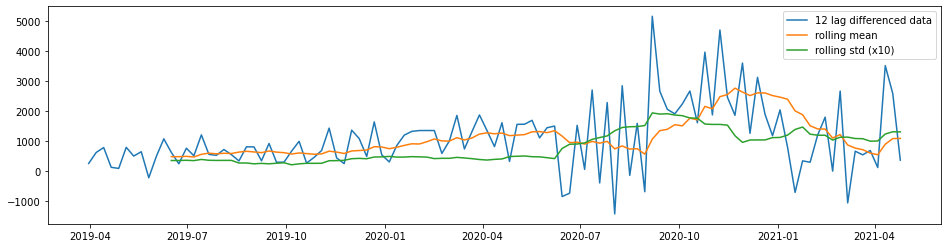

In [22]:
# Differencing
y_12lag =  y - y.shift(12)

test_stationarity(y_12lag,'12 lag differenced data')
ADF_test(y_12lag,'12 lag differenced data')

## Combining Detrending and Differencing

This approach uses both methods to stationarize the data.



 > Is the 12 lag differenced de-trended data stationary ?
Test statistic = -4.421
P-value = 0.000
Critical values :
	1%: -3.5087828609430614 - The data is  stationary with 99% confidence
	5%: -2.895783561573195 - The data is  stationary with 95% confidence
	10%: -2.5850381719848565 - The data is  stationary with 90% confidence


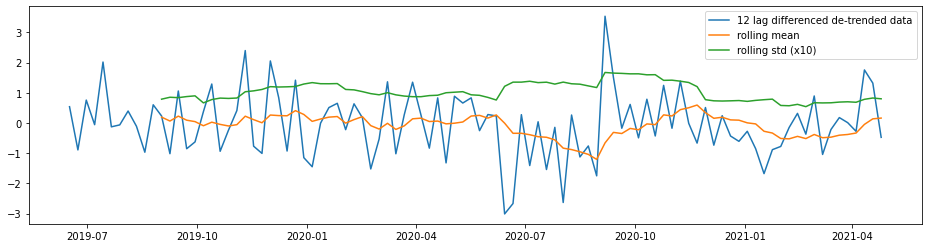

In [23]:
# Detrending + Differencing

y_12lag_detrend =  y_detrend - y_detrend.shift(12)

test_stationarity(y_12lag_detrend,'12 lag differenced de-trended data')
ADF_test(y_12lag_detrend,'12 lag differenced de-trended data')

# Set Train & Test Datasets

To get ready to evaluate the performance of the models you’re considering for your time series analysis, it’s important to split the dataset into at least two parts.

In [24]:
y_to_train = y[:'2020-12-01'] # dataset to train
y_to_val = y['2021-04-01':] # last X months for test  
predict_date = len(y) - len(y[:'2021-04-01']) # the number of data points for the test set

The Root Mean Squared Error of our forecasts with smoothing level of 0.8 is nan
The Root Mean Squared Error of our forecasts with auto optimization is nan


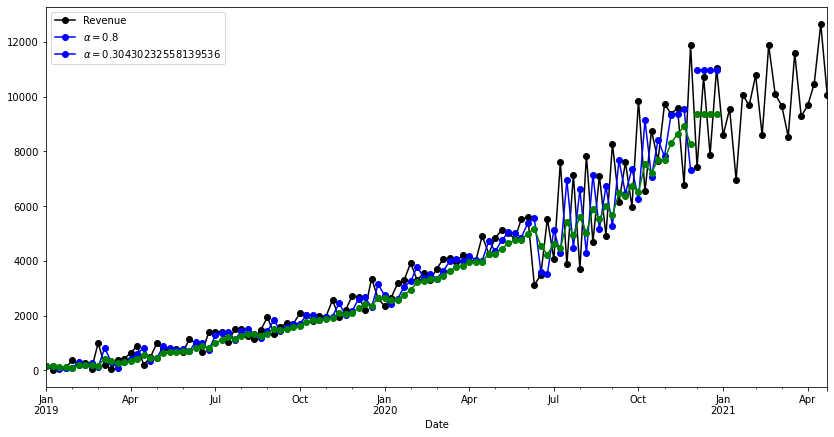

In [25]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing 

def ses(y, y_to_train,y_to_test,smoothing_level,predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # plot
    fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')
    
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()
ses(y, y_to_train,y_to_val,0.8,predict_date)

The Root Mean Squared Error of Holts Linear trend nan
The Root Mean Squared Error of Holts Exponential trend nan


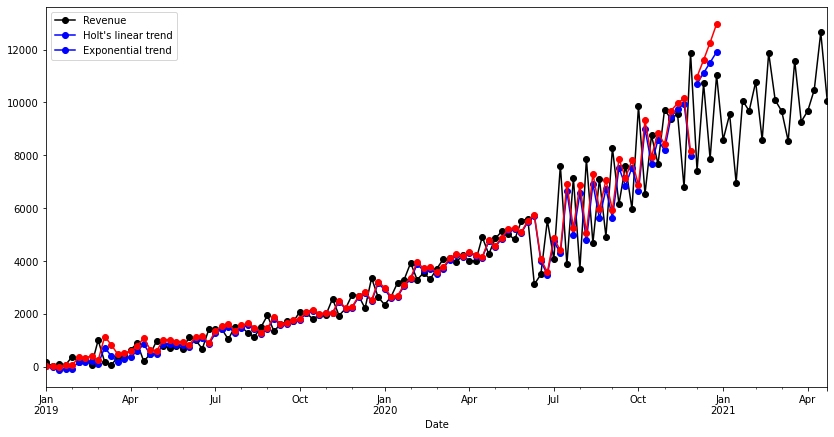

In [26]:
from statsmodels.tsa.api import Holt

def holt(y,y_to_train,y_to_test,smoothing_level,smoothing_slope, predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = Holt(y_to_train).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast1 = fit1.forecast(predict_date).rename("Holt's linear trend")
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))

    fit2 = Holt(y_to_train, exponential=True).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast2 = fit2.forecast(predict_date).rename("Exponential trend")
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Exponential trend {}'.format(round(np.sqrt(mse2), 2)))
    
    fit1.fittedvalues.plot(marker="o", color='blue')
    fcast1.plot(color='blue', marker="o", legend=True)
    fit2.fittedvalues.plot(marker="o", color='red')
    fcast2.plot(color='red', marker="o", legend=True)

    plt.show()
holt(y, y_to_train,y_to_val,0.6,0.2,predict_date)

The Root Mean Squared Error of additive trend, additive seasonal of period season_length=32 and a Box-Cox transformation nan
The Root Mean Squared Error of additive damped trend, additive seasonal of period season_length=32 and a Box-Cox transformation nan


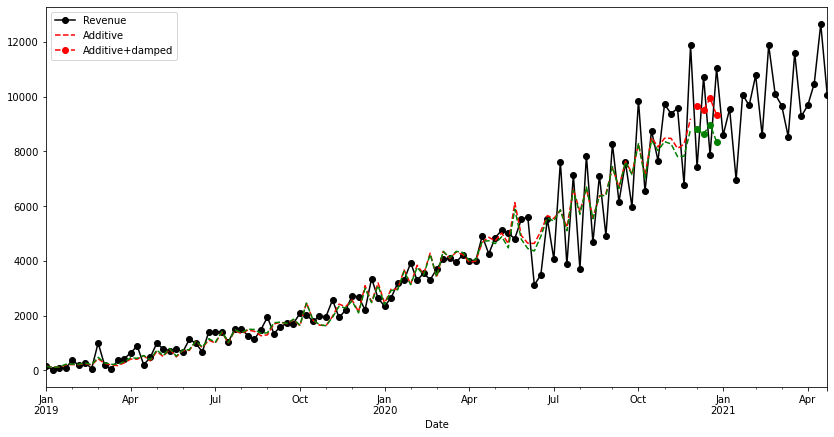

In [27]:
from statsmodels.tsa.api import ExponentialSmoothing

def holt_win_sea(y,y_to_train,y_to_test,seasonal_type,seasonal_period,predict_date):
    
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    if seasonal_type == 'additive':
        fit1 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add').fit(use_boxcox=True)
        fcast1 = fit1.forecast(predict_date).rename('Additive')
        mse1 = ((fcast1 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse1), 2)))
        
        fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
        fcast2 = fit2.forecast(predict_date).rename('Additive+damped')
        mse2 = ((fcast2 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse2), 2)))
        
        fit1.fittedvalues.plot(style='--', color='red')
        fcast1.plot(style='--', marker='o', color='red', legend=True)
        fit2.fittedvalues.plot(style='--', color='green')
        fcast2.plot(style='--', marker='o', color='green', legend=True)
    
    elif seasonal_type == 'multiplicative':  
        fit3 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul').fit(use_boxcox=True)
        fcast3 = fit3.forecast(predict_date).rename('Multiplicative')
        mse3 = ((fcast3 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse3), 2)))
        
        fit4 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
        fcast4 = fit4.forecast(predict_date).rename('Multiplicative+damped')
        mse4 = ((fcast3 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse4), 2)))
        
        fit3.fittedvalues.plot(style='--', color='red')
        fcast3.plot(style='--', marker='o', color='red', legend=True)
        fit4.fittedvalues.plot(style='--', color='green')
        fcast4.plot(style='--', marker='o', color='green', legend=True)
        
    else:
        print('Wrong Seasonal Type. Please choose between additive and multiplicative')

    plt.show()
holt_win_sea(y, y_to_train,y_to_val,'additive',32, predict_date)

In [28]:
import itertools

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))


In [29]:
sarima_grid_search(y,52)

/Users/yuliyahilevich/opt/anaconda3/envs/DataAnalytics/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yuliyahilevich/opt/anaconda3/envs/DataAnalytics/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The set of parameters with the minimum AIC is: SARIMA(1, 1, 1)x(0, 1, 1, 52) - AIC:244.0535475481595


In [30]:
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    import pandas
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index.values,
                    pred_ci.iloc[:, 0].values,
                    pred_ci.iloc[:, 1].values, color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index.values,
                    pred_dynamic_ci.iloc[:, 0].values,
                    pred_dynamic_ci.iloc[:, 1].values, color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')

    plt.legend()
    plt.show()
    
    return results

In [ ]:
# Fitting the model

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7019      0.128     -5.484      0.000      -0.953      -0.451
ma.L1         -0.5317      0.157     -3.391      0.001      -0.839      -0.224
sigma2      1.374e+06   2.62e+05      5.237      0.000     8.6e+05    1.89e+06


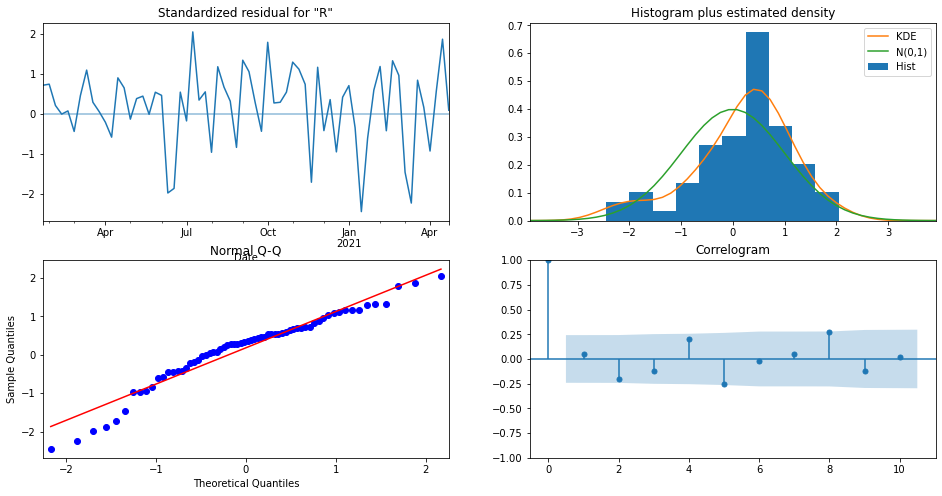

The Root Mean Squared Error of SARIMA with season_length=32 and dynamic = False 98.37


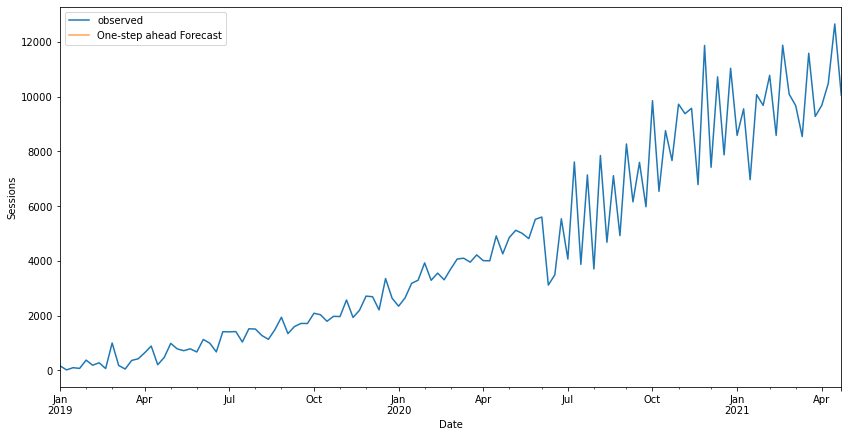

The Root Mean Squared Error of SARIMA with season_length=32 and dynamic = True 98.37


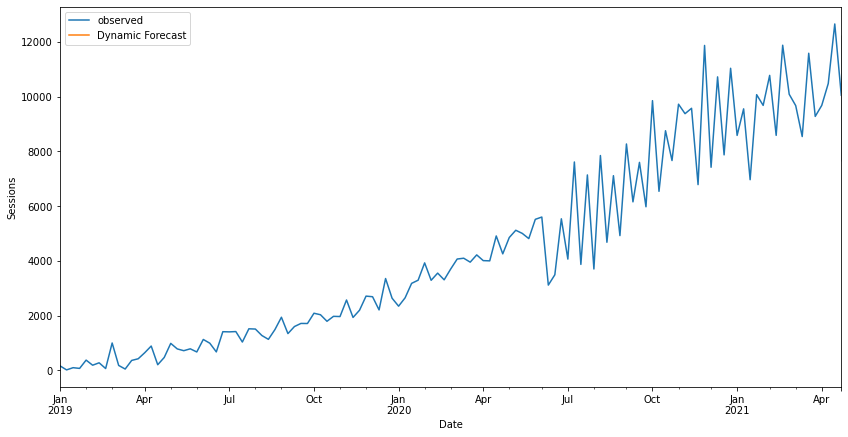

In [31]:
model1 = sarima_eva(y,(1, 1, 1),(0, 1, 0, 52),32,'2021-04-25',y_to_val)

In [32]:
def forecastfun(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel(y.name)

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

In [35]:
# Final predicted data

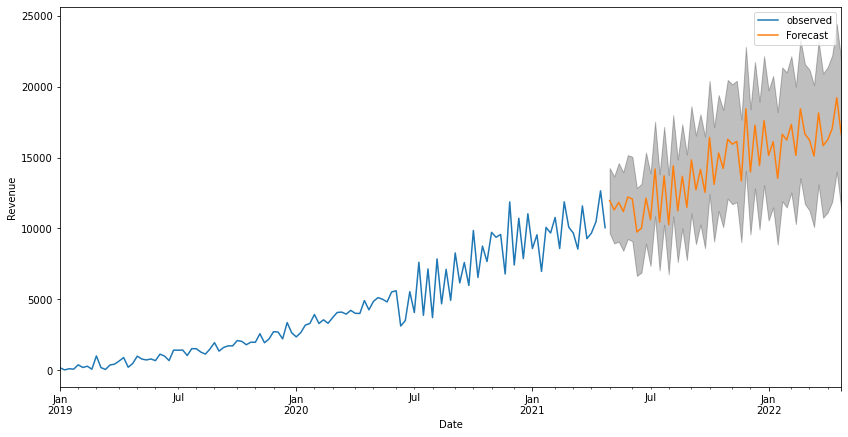

,Date,Predicted_Mean,Lower Bound,Upper Bound
0,2021-05-02,11960.68838054,9663.43405944,14257.94270165
1,2021-05-09,11303.03179741,8943.91696268,13662.14663214
2,2021-05-16,11835.89710812,9065.49467912,14606.29953712
3,2021-05-23,11191.60742914,8420.63390286,13962.58095542
4,2021-05-30,12214.03614270,9255.62857603,15172.44370938


In [33]:
final_table = forecastfun(model1,52,y)
final_table.head()

In [34]:
df

,Date,Revenue
0,2019-01-01,0.00000000
1,2019-01-02,165.90000000
2,2019-01-03,0.00000000
3,2019-01-04,0.00000000
4,2019-01-05,0.00000000
...,...,...
845,2021-04-25,2573.89000000
846,2021-04-26,820.88000000
847,2021-04-27,336.79000000
848,2021-04-28,258.00000000
